<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/damwithday_deleteNaN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [120]:
rain_data211 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172151.csv',encoding='cp949')
rain_data101 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172202.csv',encoding='cp949')
rain_data100 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172215.csv',encoding='cp949')
rain_data212 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172236.csv',encoding='cp949')
rain_data90 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172245.csv',encoding='cp949')

In [119]:
# rain_data = pd.merge(rain_data211, rain_data101, how='outer')
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data211, rain_data101, rain_data100, rain_data212, rain_data90])

In [121]:
rain_data.set_index("날짜", inplace = True)
rain_data = rain_data.dropna(how='all')

print(rain_data)

            211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
날짜                                                                   
2009-01-16         0.3         2.4         0.6         0.2        NaN
2009-01-18         0.0         0.2         4.9         0.1        NaN
2009-01-22         0.0         0.1         NaN         0.0        NaN
2009-01-24         NaN         0.4         0.2         0.0        NaN
2009-01-25         0.0         0.3         1.5         0.1        0.0
...                ...         ...         ...         ...        ...
2023-12-20         0.4         0.1         0.0         0.0        NaN
2023-12-24         NaN         NaN         NaN         0.0        NaN
2023-12-25         0.9         0.7         0.0         0.2        NaN
2023-12-30         6.8         9.9         2.3         8.5        0.7
2023-12-31         3.1         5.3         6.0         4.9       26.8

[2993 rows x 5 columns]


In [122]:
rain_col = [i for i in rain_data.columns if '강수' in i]
rain_data[rain_col] = rain_data[rain_col].fillna(0)

In [123]:
print(rain_data.isna().sum().sum())
print(rain_data)


0
            211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
날짜                                                                   
2009-01-16         0.3         2.4         0.6         0.2        0.0
2009-01-18         0.0         0.2         4.9         0.1        0.0
2009-01-22         0.0         0.1         0.0         0.0        0.0
2009-01-24         0.0         0.4         0.2         0.0        0.0
2009-01-25         0.0         0.3         1.5         0.1        0.0
...                ...         ...         ...         ...        ...
2023-12-20         0.4         0.1         0.0         0.0        0.0
2023-12-24         0.0         0.0         0.0         0.0        0.0
2023-12-25         0.9         0.7         0.0         0.2        0.0
2023-12-30         6.8         9.9         2.3         8.5        0.7
2023-12-31         3.1         5.3         6.0         4.9       26.8

[2993 rows x 5 columns]


In [124]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/only_dam_flow.csv',encoding='utf-8')
dam_flow.set_index("날짜", inplace = True)
print(dam_flow)

            유입량(㎥/s)
날짜                  
2009-01-01     0.000
2009-01-02     0.825
2009-01-03     3.904
2009-01-04     0.000
2009-01-05     0.000
...              ...
2023-12-27    25.873
2023-12-28    21.186
2023-12-29    20.887
2023-12-30    29.183
2023-12-31    25.803

[5478 rows x 1 columns]


In [128]:
date_index = rain_data.index
dam_value = dam_flow.loc[date_index]

print(dam_value)

data = pd.merge(rain_data, dam_value,on='날짜', how='outer')

# data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data, dam_flow])

            유입량(㎥/s)
날짜                  
2009-01-16     0.000
2009-01-18     0.000
2009-01-22     0.957
2009-01-24     2.003
2009-01-25     7.361
...              ...
2023-12-20    42.639
2023-12-24    24.665
2023-12-25    25.785
2023-12-30    29.183
2023-12-31    25.803

[2993 rows x 1 columns]


In [129]:
print(data)
print(max(data['유입량(㎥/s)']))

            211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)  \
날짜                                                                      
2009-01-16         0.3         2.4         0.6         0.2        0.0   
2009-01-18         0.0         0.2         4.9         0.1        0.0   
2009-01-22         0.0         0.1         0.0         0.0        0.0   
2009-01-24         0.0         0.4         0.2         0.0        0.0   
2009-01-25         0.0         0.3         1.5         0.1        0.0   
...                ...         ...         ...         ...        ...   
2023-12-20         0.4         0.1         0.0         0.0        0.0   
2023-12-24         0.0         0.0         0.0         0.0        0.0   
2023-12-25         0.9         0.7         0.0         0.2        0.0   
2023-12-30         6.8         9.9         2.3         8.5        0.7   
2023-12-31         3.1         5.3         6.0         4.9       26.8   

            유입량(㎥/s)  
날짜                    
2009

<Axes: xlabel='날짜'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


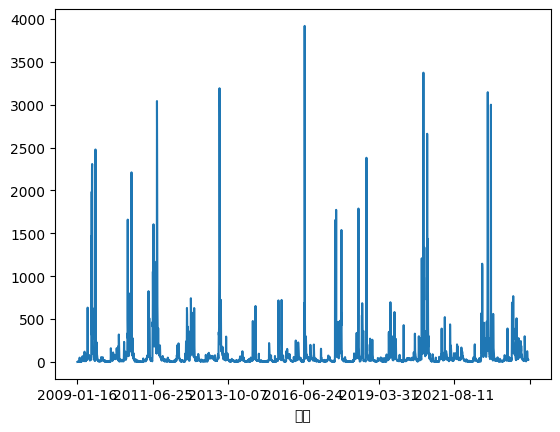

In [107]:
# data.index = pd.to_datetime(data['날짜'])

dam_flow = data['유입량(㎥/s)']
dam_flow.plot()

In [131]:
data['Y'] = data['유입량(㎥/s)']
data = data.dropna()
data.reset_index(drop=False, inplace = True)

print(data)

              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)  \
0     2009-01-16         0.3         2.4         0.6         0.2        0.0   
1     2009-01-18         0.0         0.2         4.9         0.1        0.0   
2     2009-01-22         0.0         0.1         0.0         0.0        0.0   
3     2009-01-24         0.0         0.4         0.2         0.0        0.0   
4     2009-01-25         0.0         0.3         1.5         0.1        0.0   
...          ...         ...         ...         ...         ...        ...   
2988  2023-12-20         0.4         0.1         0.0         0.0        0.0   
2989  2023-12-24         0.0         0.0         0.0         0.0        0.0   
2990  2023-12-25         0.9         0.7         0.0         0.2        0.0   
2991  2023-12-30         6.8         9.9         2.3         8.5        0.7   
2992  2023-12-31         3.1         5.3         6.0         4.9       26.8   

      유입량(㎥/s)       Y  
0        0.000   0.000  
1

In [137]:
train = data[data['날짜']<'2018-01-01']
valid = data[data['날짜']>='2018-01-01']
valid = valid[valid['날짜']<'2023-01-01']
test = data[data['날짜']>='2023-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")
train.set_index("날짜", inplace = True)
valid.set_index("날짜", inplace = True)
test.set_index("날짜", inplace = True)

trainX, trainY = train.drop(['Y'], axis = 1), train['Y']
validX, validY = valid.drop(['Y'], axis = 1), valid['Y']
testX, testY = test.drop(['Y'], axis = 1), test['Y']

train set :  1812 
 valid set :  988 
 test set :  193 



In [138]:
print(trainX)
len(trainX.columns)

            211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)  \
날짜                                                                      
2009-01-16         0.3         2.4         0.6         0.2        0.0   
2009-01-18         0.0         0.2         4.9         0.1        0.0   
2009-01-22         0.0         0.1         0.0         0.0        0.0   
2009-01-24         0.0         0.4         0.2         0.0        0.0   
2009-01-25         0.0         0.3         1.5         0.1        0.0   
...                ...         ...         ...         ...        ...   
2017-12-20         0.0         1.1         0.0         0.0        0.0   
2017-12-23         0.0         0.0         0.0         0.0        0.0   
2017-12-24        11.0        13.3         7.3        12.0        9.4   
2017-12-30         0.4         1.0         0.3         0.6        0.0   
2017-12-31         1.0         1.1         0.0         2.0        0.0   

            유입량(㎥/s)  
날짜                    
2009

6

In [139]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(LSTM(64, input_shape=(6,1)))
model1.add(Dense(40, 'relu'))
model1.add(Dense(40, 'relu'))
model1.add(Dense(8, 'relu'))
model1.add(Dense(8))
model1.add(Dense(1))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dense_27 (Dense)            (None, 40)                2600      
                                                                 
 dense_28 (Dense)            (None, 40)                1640      
                                                                 
 dense_29 (Dense)            (None, 8)                 328       
                                                                 
 dense_30 (Dense)            (None, 8)                 72        
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 21545 (84.16 KB)
Trainable params: 21545

In [140]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model1.fit(trainX, trainY, validation_data = (validX, validY), batch_size=10, epochs=50, callbacks=[cp1])

Epoch 1/50
182/182 [==============================] - 5s 20ms/step - loss: 77802.5781 - root_mean_squared_error: 278.9311 - val_loss: 87147.4062 - val_root_mean_squared_error: 295.2074
Epoch 2/50
182/182 [==============================] - 3s 17ms/step - loss: 77701.4922 - root_mean_squared_error: 278.7499 - val_loss: 86907.7031 - val_root_mean_squared_error: 294.8011
Epoch 3/50
182/182 [==============================] - 4s 23ms/step - loss: 76908.2812 - root_mean_squared_error: 277.3234 - val_loss: 84825.1875 - val_root_mean_squared_error: 291.2477
Epoch 4/50
182/182 [==============================] - 3s 18ms/step - loss: 74100.7578 - root_mean_squared_error: 272.2145 - val_loss: 80785.8672 - val_root_mean_squared_error: 284.2285
Epoch 5/50
182/182 [==============================] - 3s 18ms/step - loss: 70334.6953 - root_mean_squared_error: 265.2069 - val_loss: 76475.8984 - val_root_mean_squared_error: 276.5428
Epoch 6/50
182/182 [==============================] - 4s 24ms/step - loss: 

In [141]:
train_score = model1.evaluate(testX, testY, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score[0], np.sqrt(train_score[0])))

7/7 [==============================] - 0s 3ms/step - loss: 59.4231 - root_mean_squared_error: 7.7086
Train Score: 59.42 MSE (7.71 RMSE)


In [142]:
train_predictions = model1.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

57/57 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
날짜,,
2009-01-16,0.170775,0.000
2009-01-18,-0.580844,0.000
2009-01-22,0.357044,0.957
2009-01-24,1.048772,2.003
2009-01-25,4.796720,7.361
...,...,...
2017-12-20,-0.181802,0.000
2017-12-23,3.611085,5.522
2017-12-24,8.683485,11.366


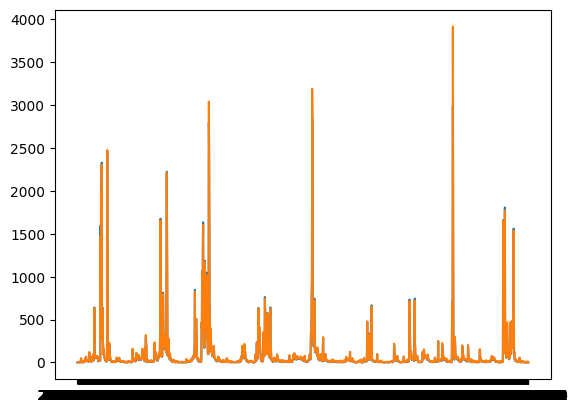

In [143]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:])
plt.plot(train_results['Actuals'][:])

In [144]:
val_predictions = model1.predict(validX).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':validY})
val_results

31/31 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
날짜,,
2018-01-08,0.179528,0.000
2018-01-09,2.213920,3.462
2018-01-15,3.112446,4.869
2018-01-17,-0.493451,0.000
2018-01-20,-0.273363,0.003
...,...,...
2022-12-24,5.126061,7.574
2022-12-28,7.612655,10.891
2022-12-29,6.359779,9.218


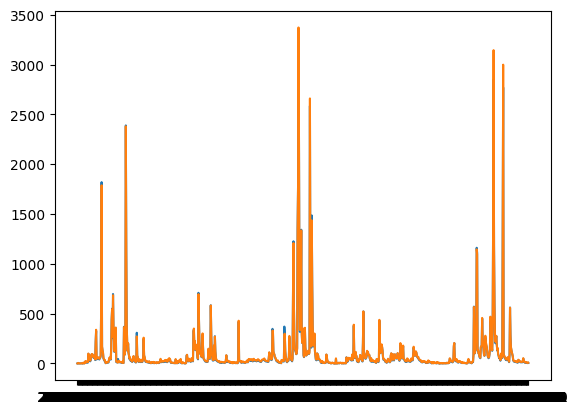

In [145]:
plt.plot(val_results['Val Predictions'][:])
plt.plot(val_results['Actuals'][:])


In [146]:
test_predictions = model1.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

7/7 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
날짜,,
2023-01-06,4.821567,7.096
2023-01-07,2.655162,3.040
2023-01-08,4.073339,6.152
2023-01-13,25.921282,31.789
2023-01-14,30.698061,36.020
...,...,...
2023-12-20,36.462177,42.639
2023-12-24,18.954266,24.665
2023-12-25,20.497309,25.785


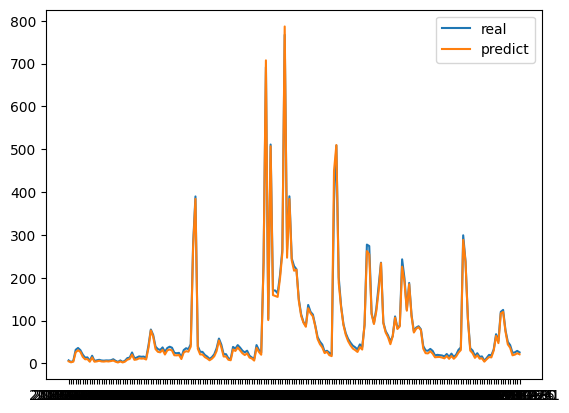

In [147]:
plt.plot(test_results['Actuals'][:])
plt.plot(test_results['Test Predictions'][:])
plt.legend(['real', 'predict'])

In [148]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(testY, test_predictions))
rsquared_score = r2_score(testY, test_predictions)
print('R^2 Score : %f' %(rsquared_score))
print('RMSE : %.2f' %(rmse))

R^2 Score : 0.995283
RMSE : 7.71
